In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create futures dataframe
futures_df = pd.read_csv('../data/input_data/futures.csv')

In [3]:
# quick check of df
display(futures_df.head())
display(futures_df.shape)
display(futures_df.dtypes)

assets_key = futures_df['symbol'].unique()
display(len(futures_df['name'].unique()))

# display(len(assets_name))
display(futures_df['name'].unique())

,Unnamed: 0,name,symbol,date,open,high,low,settle,volume
0,472,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-16,123.125000,123.125000,122.812500,122.859375,910514
1,473,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-17,122.921875,123.031250,122.500000,122.921875,1042810
2,474,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-18,122.875000,122.968750,122.609375,122.843750,861285
3,475,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-19,122.796875,123.078125,122.734375,122.968750,939993
4,476,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-20,122.921875,123.140625,122.828125,122.859375,916842


(13052, 9)

Unnamed: 0      int64
name           object
symbol         object
date           object
open          float64
high          float64
low           float64
settle        float64
volume          int64
dtype: object

13

array(['CBOT 10-year US Treasury Note Futures #1 (TY1)',
       'CBOT 30-year US Treasury Bond Futures #1 (US1)',
       'CBOT Corn Futures #2 (C2)', 'CBOT Soybeans Futures #2 (S2)',
       'CBOT Wheat Futures #2 (W2)',
       'CME Canadian Dollar CAD Futures #1 (CD1)',
       'CME Euro FX Futures #1 (EC1)',
       'CME Japanese Yen JPY Futures #1 (JY1)',
       'CME Mexican Peso Futures #1 (MP1)',
       'CME NASDAQ 100 Index Mini Futures #1 (NQ1)',
       'CME S&P 500 Index E-Mini Futures #1 (ES1)',
       'NYMEX Gold Futures #1 (GC1)',
       'NYMEX WTI Crude Oil Futures #1 (CL1)'], dtype=object)

In [4]:
# drop reduntant column
futures_df = futures_df.drop(['Unnamed: 0'],axis=1)
display(futures_df.head())

,name,symbol,date,open,high,low,settle,volume
0,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-16,123.125000,123.125000,122.812500,122.859375,910514
1,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-17,122.921875,123.031250,122.500000,122.921875,1042810
2,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-18,122.875000,122.968750,122.609375,122.843750,861285
3,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-19,122.796875,123.078125,122.734375,122.968750,939993
4,CBOT 10-year US Treasury Note Futures #1 (TY1),TY,2015-11-20,122.921875,123.140625,122.828125,122.859375,916842


In [5]:
# to keep new names in case we need them
new_names = []
key_names = futures_df['name'].unique()

for name in key_names:
    clean_name = name[0:name.find('#')]
    new_names.append(clean_name)
    
symbol_names = {}
for i in range(len(key_names)):
    symbol_names[assets_key[i]] = new_names[i]
print(symbol_names) 

{'TY': 'CBOT 10-year US Treasury Note Futures ', 'US': 'CBOT 30-year US Treasury Bond Futures ', 'C': 'CBOT Corn Futures ', 'S': 'CBOT Soybeans Futures ', 'W': 'CBOT Wheat Futures ', 'CD': 'CME Canadian Dollar CAD Futures ', 'EC': 'CME Euro FX Futures ', 'JY': 'CME Japanese Yen JPY Futures ', 'MP': 'CME Mexican Peso Futures ', 'NQ': 'CME NASDAQ 100 Index Mini Futures ', 'ES': 'CME S&P 500 Index E-Mini Futures ', 'GC': 'NYMEX Gold Futures ', 'CL': 'NYMEX WTI Crude Oil Futures '}


In [6]:
# to initialize new dict of lists
assets_list = futures_df['symbol'].unique()

col_dict = {inst:[key for key in futures_df.columns if re.match(r"{}_+".format(inst),key) ] 
                for inst in assets_list}

new_col_dict = {inst:[key for key in futures_df.columns if re.match(r"{}_+".format(inst),key) ] 
                for inst in assets_list}
display(assets_key)
display(new_col_dict)

array(['TY', 'US', 'C', 'S', 'W', 'CD', 'EC', 'JY', 'MP', 'NQ', 'ES',
       'GC', 'CL'], dtype=object)

{'TY': [],
 'US': [],
 'C': [],
 'S': [],
 'W': [],
 'CD': [],
 'EC': [],
 'JY': [],
 'MP': [],
 'NQ': [],
 'ES': [],
 'GC': [],
 'CL': []}

In [7]:
# to create new column names by asset info
asset_info = ['open', 'high', 'low', 'settle', 'volume']
print(len(col_dict))

for key in new_col_dict:
    new_col_names = []
    for info in asset_info:
        new_col_names.append(f'{key}_{info}')
    new_col_dict[key] = new_col_names
    col_dict[key] = asset_info
        
print(new_col_dict)

13
{'TY': ['TY_open', 'TY_high', 'TY_low', 'TY_settle', 'TY_volume'], 'US': ['US_open', 'US_high', 'US_low', 'US_settle', 'US_volume'], 'C': ['C_open', 'C_high', 'C_low', 'C_settle', 'C_volume'], 'S': ['S_open', 'S_high', 'S_low', 'S_settle', 'S_volume'], 'W': ['W_open', 'W_high', 'W_low', 'W_settle', 'W_volume'], 'CD': ['CD_open', 'CD_high', 'CD_low', 'CD_settle', 'CD_volume'], 'EC': ['EC_open', 'EC_high', 'EC_low', 'EC_settle', 'EC_volume'], 'JY': ['JY_open', 'JY_high', 'JY_low', 'JY_settle', 'JY_volume'], 'MP': ['MP_open', 'MP_high', 'MP_low', 'MP_settle', 'MP_volume'], 'NQ': ['NQ_open', 'NQ_high', 'NQ_low', 'NQ_settle', 'NQ_volume'], 'ES': ['ES_open', 'ES_high', 'ES_low', 'ES_settle', 'ES_volume'], 'GC': ['GC_open', 'GC_high', 'GC_low', 'GC_settle', 'GC_volume'], 'CL': ['CL_open', 'CL_high', 'CL_low', 'CL_settle', 'CL_volume']}


In [8]:
# to modify original dataframe with new columns renamed
futures_chg = futures_df.copy()
for key_new, value_new in new_col_dict.items():
    for key_old, value_old in col_dict.items():
        if key_new ==  key_old and len(value_new) == len(value_old):
            for i in range(len(value_new)):
                futures_chg[value_new[i]] = futures_chg[value_old[i]][(futures_chg['symbol'] == key_new)]

In [9]:
# to create list of df with each data and merge
df_list = []
for key, values in new_col_dict.items():
    if 'date' in values:
        values = values
    else:
        values.append('date')

    df_name = f'df_{key}'
    df_name = pd.DataFrame(futures_chg[values].dropna())
    df_name.set_index('date', inplace = True)
    df_name.index = pd.to_datetime(df_name.index)
    df_list.append(df_name)

# merge all individual asset df into a single final
df_merged = pd.concat(df_list, join='outer', axis=1).dropna()

In [10]:
# check shape of new dataframe 
display(df_merged.shape)
display(df_merged.columns)

(1004, 65)

Index(['TY_open', 'TY_high', 'TY_low', 'TY_settle', 'TY_volume', 'US_open',
       'US_high', 'US_low', 'US_settle', 'US_volume', 'C_open', 'C_high',
       'C_low', 'C_settle', 'C_volume', 'S_open', 'S_high', 'S_low',
       'S_settle', 'S_volume', 'W_open', 'W_high', 'W_low', 'W_settle',
       'W_volume', 'CD_open', 'CD_high', 'CD_low', 'CD_settle', 'CD_volume',
       'EC_open', 'EC_high', 'EC_low', 'EC_settle', 'EC_volume', 'JY_open',
       'JY_high', 'JY_low', 'JY_settle', 'JY_volume', 'MP_open', 'MP_high',
       'MP_low', 'MP_settle', 'MP_volume', 'NQ_open', 'NQ_high', 'NQ_low',
       'NQ_settle', 'NQ_volume', 'ES_open', 'ES_high', 'ES_low', 'ES_settle',
       'ES_volume', 'GC_open', 'GC_high', 'GC_low', 'GC_settle', 'GC_volume',
       'CL_open', 'CL_high', 'CL_low', 'CL_settle', 'CL_volume'],
      dtype='object')

In [11]:
# create new df to add changes
df_chg = df_merged.copy()

In [12]:
# to group keys for new columns
settle_list = [value[3] for value in new_col_dict.values()]

chg_list = []
for key in new_col_dict:
    chg_list.append(f'{key}_chg')

# info to calculate chg
chg_dict = {}
for i in range(len(settle_list)):
    chg_dict[chg_list[i]] = settle_list[i]
print(chg_dict)
    

{'TY_chg': 'TY_settle', 'US_chg': 'US_settle', 'C_chg': 'C_settle', 'S_chg': 'S_settle', 'W_chg': 'W_settle', 'CD_chg': 'CD_settle', 'EC_chg': 'EC_settle', 'JY_chg': 'JY_settle', 'MP_chg': 'MP_settle', 'NQ_chg': 'NQ_settle', 'ES_chg': 'ES_settle', 'GC_chg': 'GC_settle', 'CL_chg': 'CL_settle'}


In [13]:
# to clculate daily returns
start = 0
end = 1
for new_col, col in chg_dict.items():
    df_chg[new_col] = ((df_chg[col].shift(-end) - df_chg[col].shift(-start) ) / df_chg[col].shift(-start))*100

In [14]:
# check calculated returns make sense
display(df_chg['ES_settle'][:5])
display(df_chg['ES_chg'][:5])
display(df_chg['ES_chg'].head())
display(df_chg['CL_chg'].max())

date
2015-11-16    2033.25
2015-11-17    2034.25
2015-11-18    2065.00
2015-11-19    2064.50
2015-11-20    2074.00
Name: ES_settle, dtype: float64

date
2015-11-16    0.049182
2015-11-17    1.511614
2015-11-18   -0.024213
2015-11-19    0.460160
2015-11-20   -0.216972
Name: ES_chg, dtype: float64

date
2015-11-16    0.049182
2015-11-17    1.511614
2015-11-18   -0.024213
2015-11-19    0.460160
2015-11-20   -0.216972
Name: ES_chg, dtype: float64

14.356074425392187

In [15]:
# correlation
corr = df_chg[['TY_chg',
       'US_chg', 'C_chg', 'S_chg', 'W_chg', 'CD_chg', 'EC_chg', 'JY_chg',
       'MP_chg', 'NQ_chg', 'ES_chg', 'GC_chg', 'CL_chg']].corr(method='pearson')
display(corr)

,TY_chg,US_chg,C_chg,S_chg,W_chg,CD_chg,EC_chg,JY_chg,MP_chg,NQ_chg,ES_chg,GC_chg,CL_chg
TY_chg,1.000000,0.932386,-0.042317,-0.047461,-0.027078,-0.034342,0.118480,0.600342,-0.071754,-0.288100,-0.366493,0.429924,-0.237179
US_chg,0.932386,1.000000,-0.033827,-0.025185,-0.024755,-0.084012,0.065764,0.523676,-0.057810,-0.242416,-0.318571,0.403317,-0.236949
C_chg,-0.042317,-0.033827,1.000000,0.580892,0.652268,0.111423,0.051199,0.018697,0.121419,0.047690,0.053386,0.010517,0.101100
S_chg,-0.047461,-0.025185,0.580892,1.000000,0.393220,0.168011,0.100590,-0.013410,0.195481,0.118956,0.134200,0.049807,0.115728
W_chg,-0.027078,-0.024755,0.652268,0.393220,1.000000,0.155100,0.092015,0.023336,0.093661,0.028032,0.040674,0.037403,0.113706
CD_chg,-0.034342,-0.084012,0.111423,0.168011,0.155100,1.000000,0.383715,0.116197,0.445559,0.244306,0.314344,0.237280,0.431143
EC_chg,0.118480,0.065764,0.051199,0.100590,0.092015,0.383715,1.000000,0.392509,0.201598,-0.021518,-0.004179,0.404392,0.034816
JY_chg,0.600342,0.523676,0.018697,-0.013410,0.023336,0.116197,0.392509,1.000000,-0.050603,-0.289930,-0.346684,0.550573,-0.144637
MP_chg,-0.071754,-0.057810,0.121419,0.195481,0.093661,0.445559,0.201598,-0.050603,1.000000,0.314847,0.354651,0.025465,0.259804
NQ_chg,-0.288100,-0.242416,0.047690,0.118956,0.028032,0.244306,-0.021518,-0.289930,0.314847,1.000000,0.924308,-0.131580,0.232143


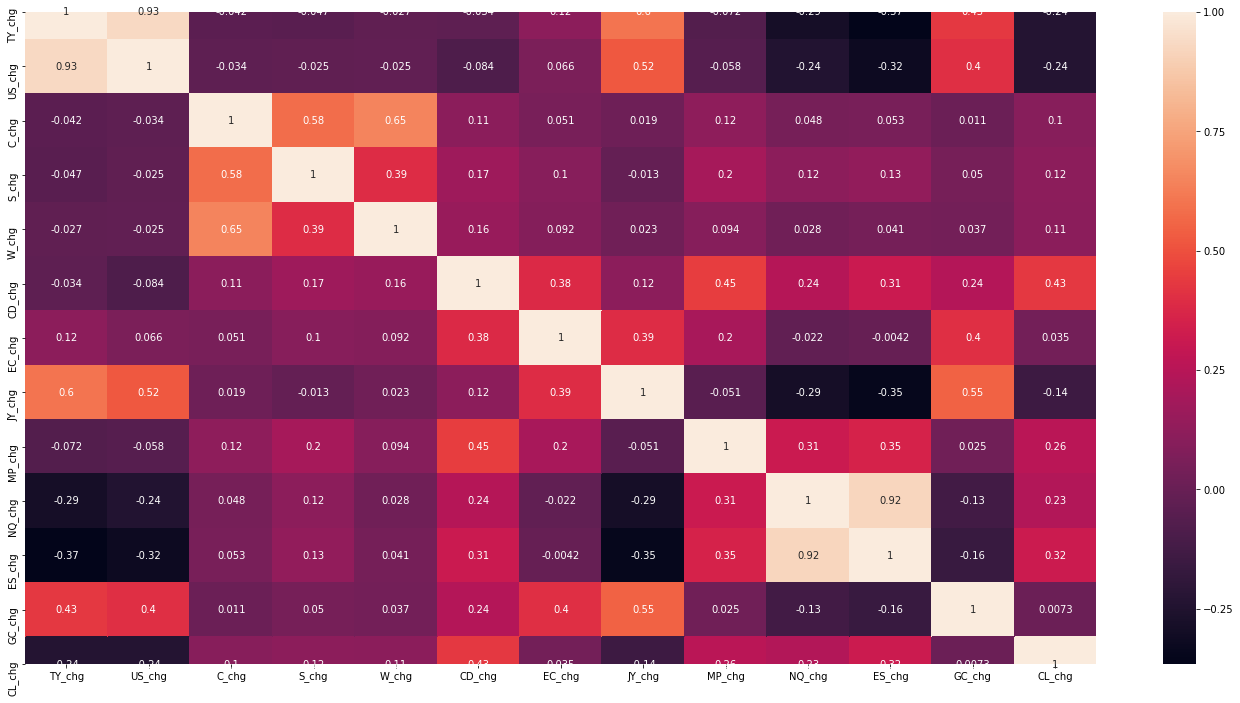

In [16]:
plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True)

# sns.heatmap(df_chg[['TY_chg',
#        'US_chg', 'C_chg', 'S_chg', 'W_chg', 'CD_chg', 'EC_chg', 'JY_chg',
#        'MP_chg', 'NQ_chg', 'ES_chg', 'GC_chg', 'CL_chg']].corr(method='spearman'), annot=True)
plt.show()

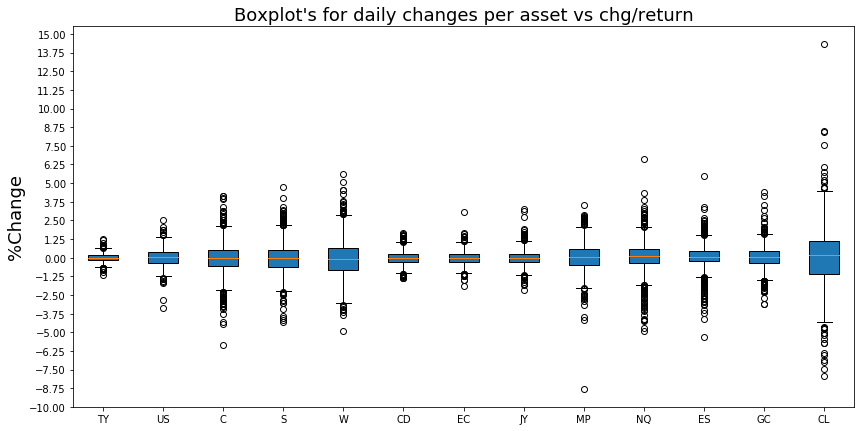

In [17]:
# boxplot for daily returns
df_chgs = df_chg.dropna()
df_chgs.index = pd.to_datetime(df_chgs.index)
labels = new_col_dict.keys()

box_plot_data = [df_chgs.TY_chg, df_chgs.US_chg, df_chgs.C_chg, df_chgs.S_chg, 
                 df_chgs.W_chg, df_chgs.CD_chg, df_chgs.EC_chg, df_chgs.JY_chg, 
                 df_chgs.MP_chg, df_chgs.NQ_chg, df_chgs.ES_chg, df_chgs.GC_chg, 
                 df_chgs.CL_chg]

fig, ax = plt.subplots(1, 1, figsize=(14,7))

ax.boxplot(box_plot_data, patch_artist=True, labels=labels)
ax.set_title("Boxplot's for daily changes per asset vs chg/return", fontsize=18)
ax.set_ylabel('%Change', fontsize=18)
plt.yticks(np.arange(-10, 15.25, step=1.25))
plt.show()

In [18]:
# to see outliers
for asset_chg in chg_list:
    # for outliers
    chg_q3 = np.percentile(df_chgs[asset_chg], 75)
    chg_q1 = np.percentile(df_chgs[asset_chg], 25)
    chg_iqr = chg_q3 - chg_q1
    outliers_up = pd.DataFrame(df_chgs[asset_chg].loc[(df_chgs[asset_chg] > (chg_q3 + chg_iqr*1.5))])
    
    outliers_down = pd.DataFrame(df_chgs[asset_chg].loc[(df_chgs[asset_chg] < (chg_q1 - chg_iqr*1.5))])

    if len(outliers_up) > 5:
        print(outliers_up.sort_values(by=[asset_chg], ascending=False)[0:5])
    else:
        print(outliers_up.sort_values(by=[asset_chg], ascending=False))
    
    print()
    
    if len(outliers_down) > 5:
        print(outliers_down.sort_values(by=[asset_chg], ascending=True)[0:5])
    else:
        print(outliers_down.sort_values(by=[asset_chg], ascending=True))
    print()
    

              TY_chg
date                
2016-06-23  1.220554
2018-05-25  1.166105
2019-07-31  0.988166
2016-06-02  0.860691
2019-01-02  0.784413

              TY_chg
date                
2016-11-08 -1.150410
2015-12-02 -0.949247
2016-05-17 -0.808724
2016-02-11 -0.752336
2019-09-04 -0.744153

              US_chg
date                
2016-06-23  2.529064
2016-06-24  2.029043
2016-02-05  1.883598
2018-05-25  1.837741
2016-02-01  1.724881

              US_chg
date                
2016-11-08 -3.401078
2015-12-02 -2.846975
2015-12-28 -1.673734
2016-05-17 -1.650165
2017-02-28 -1.553271

               C_chg
date                
2019-10-10  4.150702
2019-09-27  4.104235
2019-05-24  3.992954
2019-05-29  3.909348
2019-05-23  3.400121

               C_chg
date                
2019-08-09 -5.837712
2016-06-20 -4.428698
2019-03-28 -4.313001
2019-06-27 -3.776683
2019-10-09 -3.452528

               S_chg
date                
2016-05-09  4.764903
2018-07-05  4.012589
2019-05-13  3.401760
2019-09

In [19]:
display(df_chgs[['MP_chg', 'CD_chg']].loc['2017-04-26'])
#df_tweet['tweets'].loc[ '2017-07-01']

MP_chg    1.129688
CD_chg   -0.020076
Name: 2017-04-26 00:00:00, dtype: float64

In [20]:
print(symbol_names)

{'TY': 'CBOT 10-year US Treasury Note Futures ', 'US': 'CBOT 30-year US Treasury Bond Futures ', 'C': 'CBOT Corn Futures ', 'S': 'CBOT Soybeans Futures ', 'W': 'CBOT Wheat Futures ', 'CD': 'CME Canadian Dollar CAD Futures ', 'EC': 'CME Euro FX Futures ', 'JY': 'CME Japanese Yen JPY Futures ', 'MP': 'CME Mexican Peso Futures ', 'NQ': 'CME NASDAQ 100 Index Mini Futures ', 'ES': 'CME S&P 500 Index E-Mini Futures ', 'GC': 'NYMEX Gold Futures ', 'CL': 'NYMEX WTI Crude Oil Futures '}


In [21]:
"""

pd.set_option('display.max_columns', None) 
df_tweet = pd.DataFrame(tweet_data.clean_tweets)
df_tweet.index = pd.to_datetime(df_tweet.index)
# df_tweet = pd.set_option('display.max_columns', None) 

# pd.set_option('expand_frame_repr', True)
# display(df_tweet['tweets'].loc[ '2018-10-29'])
df_tweet['tweets'].loc[ '2018-10-29']



tweet_data.daily_tweets.head(10)
df_tweet = pd.DataFrame(tweet_data.daily_tweets)
df_tweet.index = pd.to_datetime(df_tweet.index)
display(df_tweet.loc[ '2009-05-05'])


# pd.set_option('display.max_columns', -1) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
df_tweet = pd.DataFrame(tweet_data.clean_tweets)
df_tweet.index = pd.to_datetime(df_tweet.index)
# df_tweet = pd.set_option('display.max_columns', None) 

# pd.set_option('expand_frame_repr', True)
# display(df_tweet['tweets'].loc[ '2018-10-29'])
df_tweet['tweets'].loc[ '2017-07-01']

"""

"\n\npd.set_option('display.max_columns', None) \ndf_tweet = pd.DataFrame(tweet_data.clean_tweets)\ndf_tweet.index = pd.to_datetime(df_tweet.index)\n# df_tweet = pd.set_option('display.max_columns', None) \n\n# pd.set_option('expand_frame_repr', True)\n# display(df_tweet['tweets'].loc[ '2018-10-29'])\ndf_tweet['tweets'].loc[ '2018-10-29']\n\n\n\ntweet_data.daily_tweets.head(10)\ndf_tweet = pd.DataFrame(tweet_data.daily_tweets)\ndf_tweet.index = pd.to_datetime(df_tweet.index)\ndisplay(df_tweet.loc[ '2009-05-05'])\n\n\n# pd.set_option('display.max_columns', -1) \npd.set_option('display.max_columns', None)  \npd.set_option('display.expand_frame_repr', False)\npd.set_option('max_colwidth', -1)\ndf_tweet = pd.DataFrame(tweet_data.clean_tweets)\ndf_tweet.index = pd.to_datetime(df_tweet.index)\n# df_tweet = pd.set_option('display.max_columns', None) \n\n# pd.set_option('expand_frame_repr', True)\n# display(df_tweet['tweets'].loc[ '2018-10-29'])\ndf_tweet['tweets'].loc[ '2017-07-01']\n\n"

In [22]:
vol_list = ['TY_volume', 'US_volume',  'C_volume', 'S_volume', 
            'W_volume', 'CD_volume', 'EC_volume', 'JY_volume', 
            'MP_volume', 'NQ_volume', 'ES_volume', 'GC_volume', 'CL_volume']

vol_chg_dict = {inst:[key for key in futures_df.columns if re.match(r"{}_+".format(inst),key) ] 
                for inst in assets_list}

for key in vol_chg_dict:
    new_col_avg = f'{key}_volume_avg'
    new_col_op_cl = f'{key}_OP_v_CL'
    vol_chg_dict[key] = [new_col_avg, new_col_op_cl]


display(vol_chg_dict['TY'][1])


'TY_OP_v_CL'

In [23]:
# new df to create predictors
df_new_pred = df_chg.copy()

start = -1 
end = 0 

count = 0
for col, new_col in vol_chg_dict.items():
    df_new_pred[new_col[0]] = df_new_pred[vol_list[count]].rolling(5, min_periods=1).mean()
    df_new_pred[f'{col}_volume_chg'] = ((df_new_pred[new_col[0]].shift(-end) - df_new_pred[new_col[0]].shift(-start) 
                                       ) / df_new_pred[new_col[0]].shift(-start))*100
    df_new_pred[new_col[1]] = (df_new_pred[f'{col}_open'].shift(-end) - df_new_pred[f'{col}_settle'].shift(-start))
    df_new_pred[f'{col}_opening'] = [('up' if op_v_cl > 0 else ('down' if op_v_cl < 0 else 'unch')) 
                              for op_v_cl in df_new_pred[new_col[1]]]
                        
    count +=1

In [24]:
display(df_new_pred[['TY_volume', 'TY_volume_avg', 'TY_volume_chg','TY_OP_v_CL', 'TY_opening', 'TY_chg']].head(10))


,TY_volume,TY_volume_avg,TY_volume_chg,TY_OP_v_CL,TY_opening,TY_chg
date,,,,,,
2015-11-16,910514.0,910514.0,NaN,NaN,unch,0.050871
2015-11-17,1042810.0,976662.0,7.264908,0.062500,up,-0.063557
2015-11-18,861285.0,938203.0,-3.937800,-0.046875,down,0.101755
2015-11-19,939993.0,938650.5,0.047698,-0.046875,down,-0.088945
2015-11-20,916842.0,934288.8,-0.464678,-0.046875,down,0.114460
2015-11-23,1634909.0,1079167.8,15.506875,-0.031250,down,0.076220
2015-11-24,2317561.0,1334118.0,23.624704,0.046875,up,0.025387
2015-11-25,1236743.0,1409209.6,5.628558,0.015625,up,0.088832
2015-11-27,531192.0,1327449.4,-5.801848,-0.078125,down,-0.050716


In [25]:
temp_cols = vol_chg_dict.values()

df_preds = df_new_pred.copy()

for cols in temp_cols:
    df_preds = df_preds.drop(cols, axis=1)

df_preds = df_preds.drop(df_merged.columns, axis=1)
display(df_preds.head())

,TY_chg,US_chg,C_chg,S_chg,W_chg,CD_chg,EC_chg,JY_chg,MP_chg,NQ_chg,...,MP_volume_chg,MP_opening,NQ_volume_chg,NQ_opening,ES_volume_chg,ES_opening,GC_volume_chg,GC_opening,CL_volume_chg,CL_opening
date,,,,,,,,,,,,,,,,,,,,,
2015-11-16,0.050871,0.435680,0.145773,0.410034,-1.058201,0.130796,-0.248181,-0.112918,0.263745,0.205101,...,NaN,unch,NaN,unch,NaN,unch,NaN,unch,NaN,unch
2015-11-17,-0.063557,0.000000,0.000000,-0.408359,-0.200535,-0.143688,-0.017159,-0.113045,0.060704,1.742416,...,-9.487984,up,-2.480323,up,-2.869230,up,8.504745,down,-10.880246,up
2015-11-18,0.101755,0.616438,0.436681,0.217077,0.837240,0.327033,0.737944,0.520598,1.071790,0.154751,...,-1.474846,up,-4.076211,up,-2.553725,up,-3.044936,up,7.026649,up
2015-11-19,-0.088945,-0.181529,-0.048309,-0.240674,-0.365327,-0.365082,-0.681431,0.016888,0.720288,0.607746,...,14.791535,up,-4.872332,down,-5.156960,down,2.525782,up,7.071820,up
2015-11-20,0.114460,0.363719,0.579990,0.554885,1.166667,-0.222469,-0.248714,0.005628,-0.198649,-0.281560,...,1.550716,down,-5.892286,down,13.056758,down,-14.641963,up,4.785334,up


In [26]:
display(df_preds[['CL_chg', 'CL_volume_chg', 'CL_opening']].head())

,CL_chg,CL_volume_chg,CL_opening
date,,,
2015-11-16,-1.807531,NaN,unch
2015-11-17,0.409068,-10.880246,up
2015-11-18,-0.390426,7.026649,up
2015-11-19,0.306748,7.071820,up
2015-11-20,-0.254842,4.785334,up


In [27]:
# dummies for opening
df_preds = pd.get_dummies(df_preds, columns=['TY_opening', 'US_opening',
                                             'C_opening', 'S_opening',
                                             'W_opening', 'CD_opening', 
                                             'EC_opening', 'JY_opening',
                                             'MP_opening', 'NQ_opening',
                                             'ES_opening', 'GC_opening','CL_opening'])

In [28]:
display(df_preds.tail())

,TY_chg,US_chg,C_chg,S_chg,W_chg,CD_chg,EC_chg,JY_chg,MP_chg,NQ_chg,...,NQ_opening_up,ES_opening_down,ES_opening_unch,ES_opening_up,GC_opening_down,GC_opening_unch,GC_opening_up,CL_opening_down,CL_opening_unch,CL_opening_up
date,,,,,,,,,,,,,,,,,,,,,
2019-11-04,-0.506451,-0.999412,-0.444727,-0.420499,0.774818,-0.065742,-0.573605,-0.552756,-0.096544,-0.060859,...,1,0,0,1,0,0,1,0,0,1
2019-11-05,0.315113,0.692795,-1.021059,-0.686197,0.240269,-0.197355,0.027043,0.261566,0.231929,-0.042627,...,1,0,0,1,0,0,1,0,0,1
2019-11-06,-0.724900,-1.454688,-1.031593,0.850385,-0.814957,0.013183,-0.216284,-0.369585,0.250675,0.283286,...,0,1,0,0,0,0,1,0,0,1
2019-11-07,0.000000,-0.159585,0.716612,-0.500659,-0.579990,-0.349305,-0.216753,0.147291,0.153876,0.325011,...,1,0,0,1,1,0,0,0,1,0
2019-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,1,1,0,0


In [29]:
# clean nan & only predictos
df_preds = df_preds.dropna()
df_preds = df_preds.drop(columns=['TY_chg', 'US_chg', 'C_chg', 
                                  'S_chg', 'W_chg', 'CD_chg', 
                                  'EC_chg', 'JY_chg', 'MP_chg',
                                  'NQ_chg', 'ES_chg', 'GC_chg', 
                                  'CL_chg'], axis=1)

In [30]:
display(df_preds.head())
display(df_preds.tail())

,TY_volume_chg,US_volume_chg,C_volume_chg,S_volume_chg,W_volume_chg,CD_volume_chg,EC_volume_chg,JY_volume_chg,MP_volume_chg,NQ_volume_chg,...,NQ_opening_up,ES_opening_down,ES_opening_unch,ES_opening_up,GC_opening_down,GC_opening_unch,GC_opening_up,CL_opening_down,CL_opening_unch,CL_opening_up
date,,,,,,,,,,,,,,,,,,,,,
2015-11-17,7.264908,15.490918,24.506945,-0.360762,110.707511,-1.582925,2.775035,-25.097245,-9.487984,-2.480323,...,1,0,0,1,1,0,0,0,0,1
2015-11-18,-3.937800,-2.338013,14.887758,48.598815,7.521267,2.253567,3.006541,8.761078,-1.474846,-4.076211,...,1,0,0,1,0,0,1,0,0,1
2015-11-19,0.047698,28.648659,1.152503,2.666122,0.050234,0.956822,8.022800,-8.684613,14.791535,-4.872332,...,0,1,0,0,0,0,1,0,0,1
2015-11-20,-0.464678,-2.639304,-1.979218,6.434186,-6.863598,7.343141,1.632575,-9.503479,1.550716,-5.892286,...,0,1,0,0,0,0,1,0,0,1
2015-11-23,15.506875,10.638416,4.286497,14.352737,15.793635,5.520806,3.223812,-17.977841,-3.448337,-10.153613,...,0,0,0,1,1,0,0,1,0,0


,TY_volume_chg,US_volume_chg,C_volume_chg,S_volume_chg,W_volume_chg,CD_volume_chg,EC_volume_chg,JY_volume_chg,MP_volume_chg,NQ_volume_chg,...,NQ_opening_up,ES_opening_down,ES_opening_unch,ES_opening_up,GC_opening_down,GC_opening_unch,GC_opening_up,CL_opening_down,CL_opening_unch,CL_opening_up
date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,5.444218,3.559422,2.346276,-7.204511,6.994584,5.248811,8.418831,8.156451,6.478965,0.135277,...,1,0,0,1,0,0,1,1,0,0
2019-11-04,-0.249927,0.744727,8.269223,-2.750233,-3.320639,-1.795057,6.518063,0.180374,1.368208,0.815442,...,1,0,0,1,0,0,1,0,0,1
2019-11-05,9.582721,7.085331,2.704347,-11.998904,2.290130,-1.928930,4.955569,9.126471,0.091712,-2.284713,...,1,0,0,1,0,0,1,0,0,1
2019-11-06,0.769120,0.529222,4.371096,-3.834591,15.326201,-21.129020,-7.754343,-0.602006,-6.454871,-3.647642,...,0,1,0,0,0,0,1,0,0,1
2019-11-07,5.457695,4.377160,12.496372,1.452101,18.185768,-6.346015,-2.141936,2.863428,-5.892271,-4.716510,...,1,0,0,1,1,0,0,0,1,0


In [31]:
# create csv_file of only predictors
df_preds.to_csv('../data/features/market_features.csv'

SyntaxError: unexpected EOF while parsing (<ipython-input-31-fb95b9229c57>, line 2)